In [107]:
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.preprocessing import MinMaxScaler, LabelEncoder
    from imblearn.over_sampling import SMOTE, RandomOverSampler
    from sklearn.model_selection import train_test_split
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense
    from tensorflow.keras.optimizers import SGD, Adam
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import mean_absolute_error

In [108]:
df=pd.read_csv("train-data.csv")

In [109]:
df

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [111]:
df = df.drop(columns=['Unnamed: 0','New_Price'])

In [112]:
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


<AxesSubplot:title={'center':'PEARSON'}>

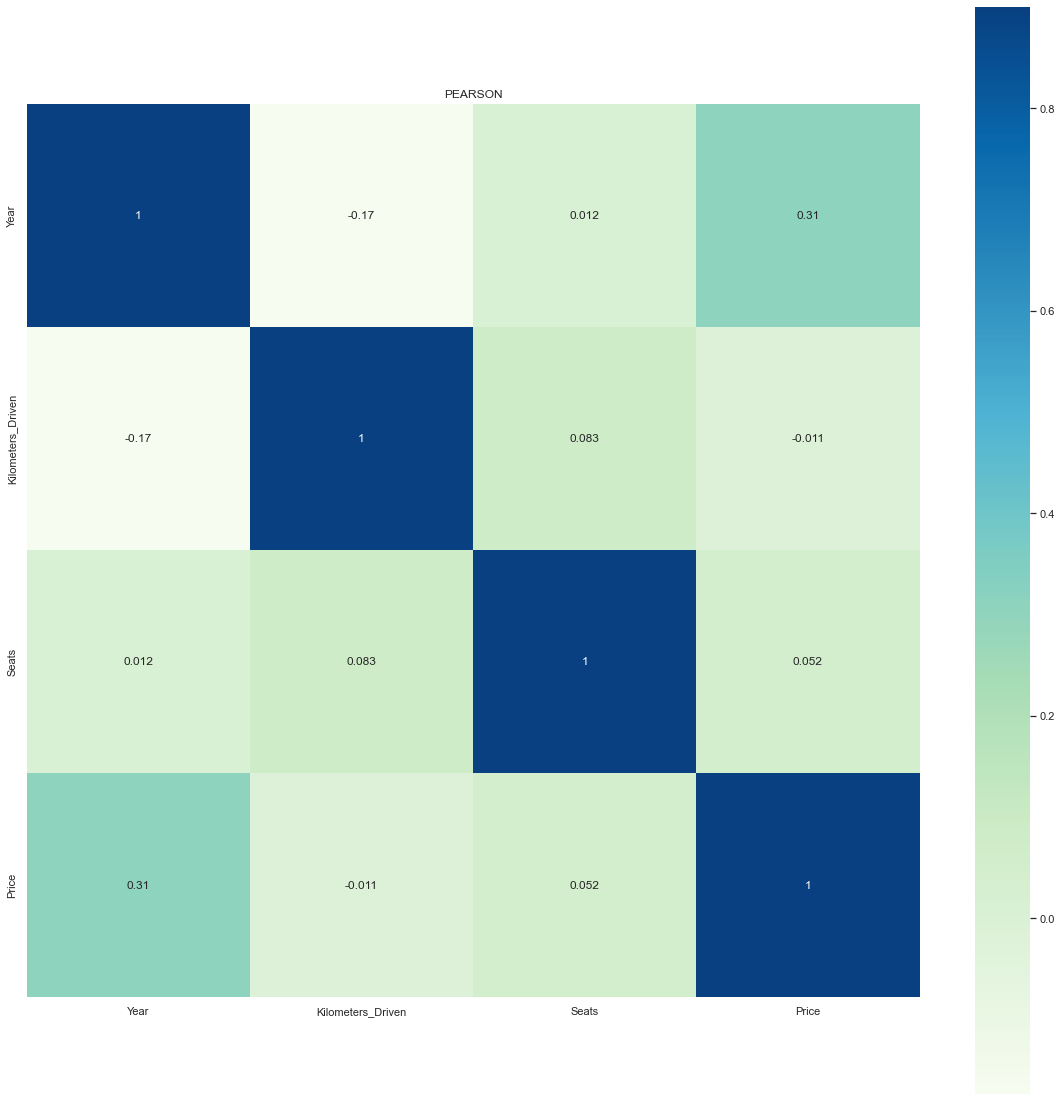

In [113]:
sns.set(style="whitegrid", font_scale=1)
plt.figure(figsize=(20,20))
plt.title("PEARSON")
sns.heatmap(df.corr(method='pearson'), vmax=0.9, cmap="GnBu", square=True, linecolor='b', annot=True)

In [114]:
#plt.figure(num=None, figsize=(8,6))
#df.groupby(df['Name'])['Price'].sum().plot(kind='bar')

In [115]:
df_n=df['Name'].str.split(expand=True)[0]
df_e=df['Engine'].str.split(expand=True)[0]
df_p=df['Power'].str.split(expand=True)[0]

In [116]:
df = df.drop(columns=['Name', 'Engine','Power'])

In [117]:
df=pd.concat([df, df_n, df_e, df_p], axis=1)

In [118]:
df.columns=['Location','Year', 'Kilometers_Driven',
            'Fuel_Type',      'Transmission',        'Owner_Type',
                 'Mileage',             'Seats',             'Price',
                         'Name',                   'Engine',                   'Power']

In [119]:
df

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Seats,Price,Name,Engine,Power
0,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,5.0,1.75,Maruti,998,58.16
1,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,5.0,12.50,Hyundai,1582,126.2
2,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,5.0,4.50,Honda,1199,88.7
3,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,7.0,6.00,Maruti,1248,88.76
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,5.0,17.74,Audi,1968,140.8
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,5.0,4.75,Maruti,1248,74
6015,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,5.0,4.00,Hyundai,1120,71
6016,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,8.0,2.90,Mahindra,2498,112
6017,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,5.0,2.65,Maruti,998,67.1


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           6019 non-null   object 
 1   Year               6019 non-null   int64  
 2   Kilometers_Driven  6019 non-null   int64  
 3   Fuel_Type          6019 non-null   object 
 4   Transmission       6019 non-null   object 
 5   Owner_Type         6019 non-null   object 
 6   Mileage            6017 non-null   object 
 7   Seats              5977 non-null   float64
 8   Price              6019 non-null   float64
 9   Name               6019 non-null   object 
 10  Engine             5983 non-null   object 
 11  Power              5983 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


In [121]:
df['Power'] = pd.to_numeric(df['Power'],errors='coerce')#Convierte a numeros, si hay errores, establezca NaN 
df['Engine'] = pd.to_numeric(df['Engine'],errors='coerce')

In [122]:
df_m=df['Mileage'].str.split(expand=True)

In [123]:
df_m[1].value_counts()

kmpl     5951
km/kg      66
Name: 1, dtype: int64

In [124]:
df_m

,0,1
0,26.6,km/kg
1,19.67,kmpl
2,18.2,kmpl
3,20.77,kmpl
4,15.2,kmpl
...,...,...
6014,28.4,kmpl
6015,24.4,kmpl
6016,14.0,kmpl
6017,18.9,kmpl


In [125]:
df

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Seats,Price,Name,Engine,Power
0,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,5.0,1.75,Maruti,998.0,58.16
1,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,5.0,12.50,Hyundai,1582.0,126.20
2,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,5.0,4.50,Honda,1199.0,88.70
3,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,7.0,6.00,Maruti,1248.0,88.76
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,5.0,17.74,Audi,1968.0,140.80
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,5.0,4.75,Maruti,1248.0,74.00
6015,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,5.0,4.00,Hyundai,1120.0,71.00
6016,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,8.0,2.90,Mahindra,2498.0,112.00
6017,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,5.0,2.65,Maruti,998.0,67.10


In [126]:
df = df.drop(columns=['Mileage'])

In [127]:
df=pd.concat([df, df_m[0]], axis=1)

In [128]:
df

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Name,Engine,Power,0
0,Mumbai,2010,72000,CNG,Manual,First,5.0,1.75,Maruti,998.0,58.16,26.6
1,Pune,2015,41000,Diesel,Manual,First,5.0,12.50,Hyundai,1582.0,126.20,19.67
2,Chennai,2011,46000,Petrol,Manual,First,5.0,4.50,Honda,1199.0,88.70,18.2
3,Chennai,2012,87000,Diesel,Manual,First,7.0,6.00,Maruti,1248.0,88.76,20.77
4,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,17.74,Audi,1968.0,140.80,15.2
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Delhi,2014,27365,Diesel,Manual,First,5.0,4.75,Maruti,1248.0,74.00,28.4
6015,Jaipur,2015,100000,Diesel,Manual,First,5.0,4.00,Hyundai,1120.0,71.00,24.4
6016,Jaipur,2012,55000,Diesel,Manual,Second,8.0,2.90,Mahindra,2498.0,112.00,14.0
6017,Kolkata,2013,46000,Petrol,Manual,First,5.0,2.65,Maruti,998.0,67.10,18.9


In [129]:
df.columns=[         'Location',              'Year', 'Kilometers_Driven',
               'Fuel_Type',      'Transmission',        'Owner_Type',
                   'Seats',             'Price',              'Name',
                  'Engine',             'Power',                  'Mileage' ]

In [130]:
##Borrar filas de un DF
df_idx=df_m[df_m[1]=='km/kg'].index
df.drop(df_idx, inplace=True)

In [131]:
df

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Name,Engine,Power,Mileage
1,Pune,2015,41000,Diesel,Manual,First,5.0,12.50,Hyundai,1582.0,126.20,19.67
2,Chennai,2011,46000,Petrol,Manual,First,5.0,4.50,Honda,1199.0,88.70,18.2
3,Chennai,2012,87000,Diesel,Manual,First,7.0,6.00,Maruti,1248.0,88.76,20.77
4,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,17.74,Audi,1968.0,140.80,15.2
6,Jaipur,2013,86999,Diesel,Manual,First,5.0,3.50,Nissan,1461.0,63.10,23.08
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Delhi,2014,27365,Diesel,Manual,First,5.0,4.75,Maruti,1248.0,74.00,28.4
6015,Jaipur,2015,100000,Diesel,Manual,First,5.0,4.00,Hyundai,1120.0,71.00,24.4
6016,Jaipur,2012,55000,Diesel,Manual,Second,8.0,2.90,Mahindra,2498.0,112.00,14.0
6017,Kolkata,2013,46000,Petrol,Manual,First,5.0,2.65,Maruti,998.0,67.10,18.9


In [132]:
##De object a float
df['Mileage'] = pd.to_numeric(df['Mileage'],errors='coerce')

In [133]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,5953.0,2013.356459,3.275069,1998.00,2011.0,2014.00,2016.000,2019.0
Kilometers_Driven,5953.0,58767.288762,91743.841231,171.00,34000.0,53000.00,73000.000,6500000.0
Seats,5911.0,5.281509,0.810628,0.00,5.0,5.00,5.000,10.0
Price,5953.0,9.547306,11.230163,0.44,3.5,5.70,10.000,160.0
Engine,5917.0,1627.298293,601.584633,72.00,1198.0,1495.00,1991.000,5998.0
Power,5811.0,113.803144,53.896719,34.20,78.0,98.60,139.010,560.0
Mileage,5951.0,18.064325,4.511393,0.00,15.1,18.12,21.025,28.4


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5953 entries, 1 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           5953 non-null   object 
 1   Year               5953 non-null   int64  
 2   Kilometers_Driven  5953 non-null   int64  
 3   Fuel_Type          5953 non-null   object 
 4   Transmission       5953 non-null   object 
 5   Owner_Type         5953 non-null   object 
 6   Seats              5911 non-null   float64
 7   Price              5953 non-null   float64
 8   Name               5953 non-null   object 
 9   Engine             5917 non-null   float64
 10  Power              5811 non-null   float64
 11  Mileage            5951 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 604.6+ KB


In [135]:
df['Location'].value_counts()

Mumbai        772
Hyderabad     733
Kochi         643
Coimbatore    636
Pune          608
Delhi         544
Kolkata       535
Chennai       492
Jaipur        411
Bangalore     358
Ahmedabad     221
Name: Location, dtype: int64

In [136]:
df['Fuel_Type'].value_counts()

Diesel      3205
Petrol      2746
Electric       2
Name: Fuel_Type, dtype: int64

In [137]:
df['Transmission'].value_counts()

Manual       4233
Automatic    1720
Name: Transmission, dtype: int64

In [138]:
df['Owner_Type'].value_counts()

First             4876
Second             956
Third              112
Fourth & Above       9
Name: Owner_Type, dtype: int64

In [139]:
df['Name'].value_counts()

Maruti           1157
Hyundai          1098
Honda             608
Toyota            410
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          272
BMW               267
Audi              236
Tata              184
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land               60
Jaguar             40
Fiat               28
Mitsubishi         27
Mini               26
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Force               3
ISUZU               2
Smart               1
Ambassador          1
Isuzu               1
Bentley             1
Lamborghini         1
Name: Name, dtype: int64

<AxesSubplot:xlabel='Name'>

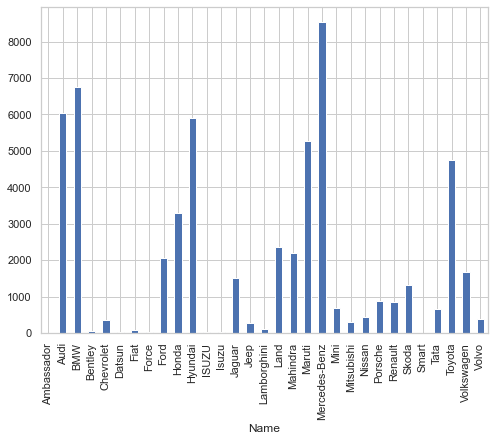

In [140]:
plt.figure(num=None, figsize=(8,6))
df.groupby(df['Name'])['Price'].sum().plot(kind='bar')

<AxesSubplot:title={'center':'PEARSON'}>

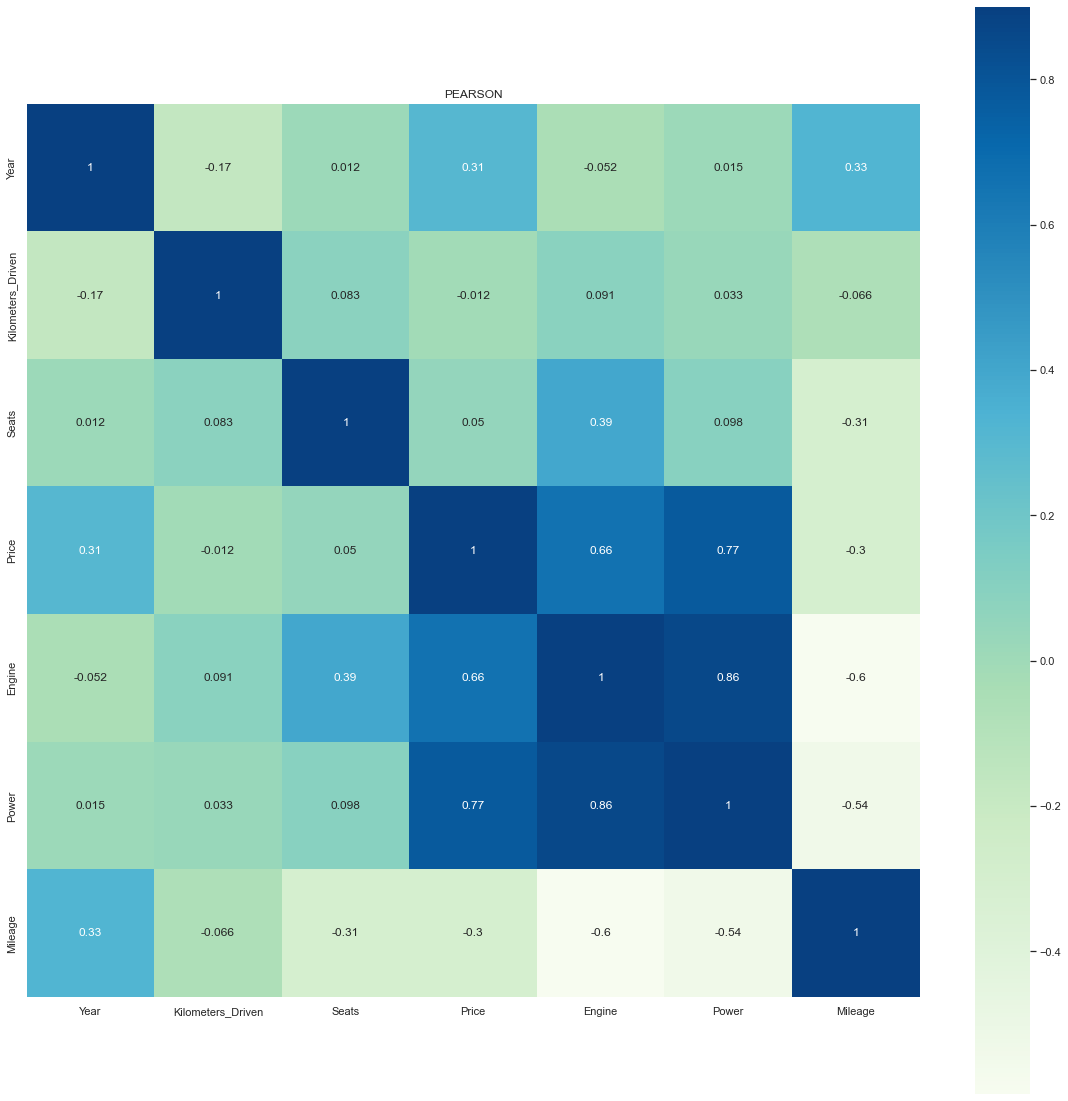

In [141]:
sns.set(style="whitegrid", font_scale=1)
plt.figure(figsize=(20,20))
plt.title("PEARSON")
sns.heatmap(df.corr(method='pearson'), vmax=0.9, cmap="GnBu", square=True, linecolor='b', annot=True)

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5953 entries, 1 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           5953 non-null   object 
 1   Year               5953 non-null   int64  
 2   Kilometers_Driven  5953 non-null   int64  
 3   Fuel_Type          5953 non-null   object 
 4   Transmission       5953 non-null   object 
 5   Owner_Type         5953 non-null   object 
 6   Seats              5911 non-null   float64
 7   Price              5953 non-null   float64
 8   Name               5953 non-null   object 
 9   Engine             5917 non-null   float64
 10  Power              5811 non-null   float64
 11  Mileage            5951 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 604.6+ KB


In [145]:
df['Mileage'].fillna(18.06,inplace=True)#Remplza NaN con 0s
df['Power'].fillna(113.80,inplace=True)#Remplza NaN con 0s
df['Engine'].fillna(1627.29,inplace=True)#Remplza NaN con 0s
df['Seats'].fillna(5,inplace=True)#Remplza NaN con 0s

In [144]:
df.describe()

,Year,Kilometers_Driven,Seats,Price,Engine,Power,Mileage
count,5953.000000,5.953000e+03,5911.000000,5953.000000,5917.000000,5811.000000,5951.000000
mean,2013.356459,5.876729e+04,5.281509,9.547306,1627.298293,113.803144,18.064325
std,3.275069,9.174384e+04,0.810628,11.230163,601.584633,53.896719,4.511393
min,1998.000000,1.710000e+02,0.000000,0.440000,72.000000,34.200000,0.000000
25%,2011.000000,3.400000e+04,5.000000,3.500000,1198.000000,78.000000,15.100000
50%,2014.000000,5.300000e+04,5.000000,5.700000,1495.000000,98.600000,18.120000
75%,2016.000000,7.300000e+04,5.000000,10.000000,1991.000000,139.010000,21.025000
max,2019.000000,6.500000e+06,10.000000,160.000000,5998.000000,560.000000,28.400000


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5953 entries, 1 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           5953 non-null   object 
 1   Year               5953 non-null   int64  
 2   Kilometers_Driven  5953 non-null   int64  
 3   Fuel_Type          5953 non-null   object 
 4   Transmission       5953 non-null   object 
 5   Owner_Type         5953 non-null   object 
 6   Seats              5953 non-null   float64
 7   Price              5953 non-null   float64
 8   Name               5953 non-null   object 
 9   Engine             5953 non-null   float64
 10  Power              5953 non-null   float64
 11  Mileage            5953 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 604.6+ KB


In [212]:
x=df.drop(columns=['Price']) ##1 columnas, 0 filas
y=df['Price']

In [223]:
len(df.Price)

5953

In [149]:
x = x.drop(columns=['Name'])

In [150]:
x.info

<bound method DataFrame.info of         Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
1           Pune  2015              41000    Diesel       Manual      First   
2        Chennai  2011              46000    Petrol       Manual      First   
3        Chennai  2012              87000    Diesel       Manual      First   
4     Coimbatore  2013              40670    Diesel    Automatic     Second   
6         Jaipur  2013              86999    Diesel       Manual      First   
...          ...   ...                ...       ...          ...        ...   
6014       Delhi  2014              27365    Diesel       Manual      First   
6015      Jaipur  2015             100000    Diesel       Manual      First   
6016      Jaipur  2012              55000    Diesel       Manual     Second   
6017     Kolkata  2013              46000    Petrol       Manual      First   
6018   Hyderabad  2011              47000    Diesel       Manual      First   

      Seats  Engine

In [151]:
x = pd.get_dummies(x)

In [152]:
x

,Year,Kilometers_Driven,Seats,Engine,Power,Mileage,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
1,2015,41000,5.0,1582.0,126.20,19.67,0,0,0,0,...,1,1,0,0,0,1,1,0,0,0
2,2011,46000,5.0,1199.0,88.70,18.20,0,0,1,0,...,0,0,0,1,0,1,1,0,0,0
3,2012,87000,7.0,1248.0,88.76,20.77,0,0,1,0,...,0,1,0,0,0,1,1,0,0,0
4,2013,40670,5.0,1968.0,140.80,15.20,0,0,0,1,...,0,1,0,0,1,0,0,0,1,0
6,2013,86999,5.0,1461.0,63.10,23.08,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,2014,27365,5.0,1248.0,74.00,28.40,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
6015,2015,100000,5.0,1120.0,71.00,24.40,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
6016,2012,55000,8.0,2498.0,112.00,14.00,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
6017,2013,46000,5.0,998.0,67.10,18.90,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0


In [153]:
##Escalado de datos
scaler=MinMaxScaler()
x=scaler.fit_transform(x)

array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Kilometers_Driven'}>,
        <AxesSubplot:title={'center':'Seats'}>],
       [<AxesSubplot:title={'center':'Price'}>,
        <AxesSubplot:title={'center':'Engine'}>,
        <AxesSubplot:title={'center':'Power'}>],
       [<AxesSubplot:title={'center':'Mileage'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

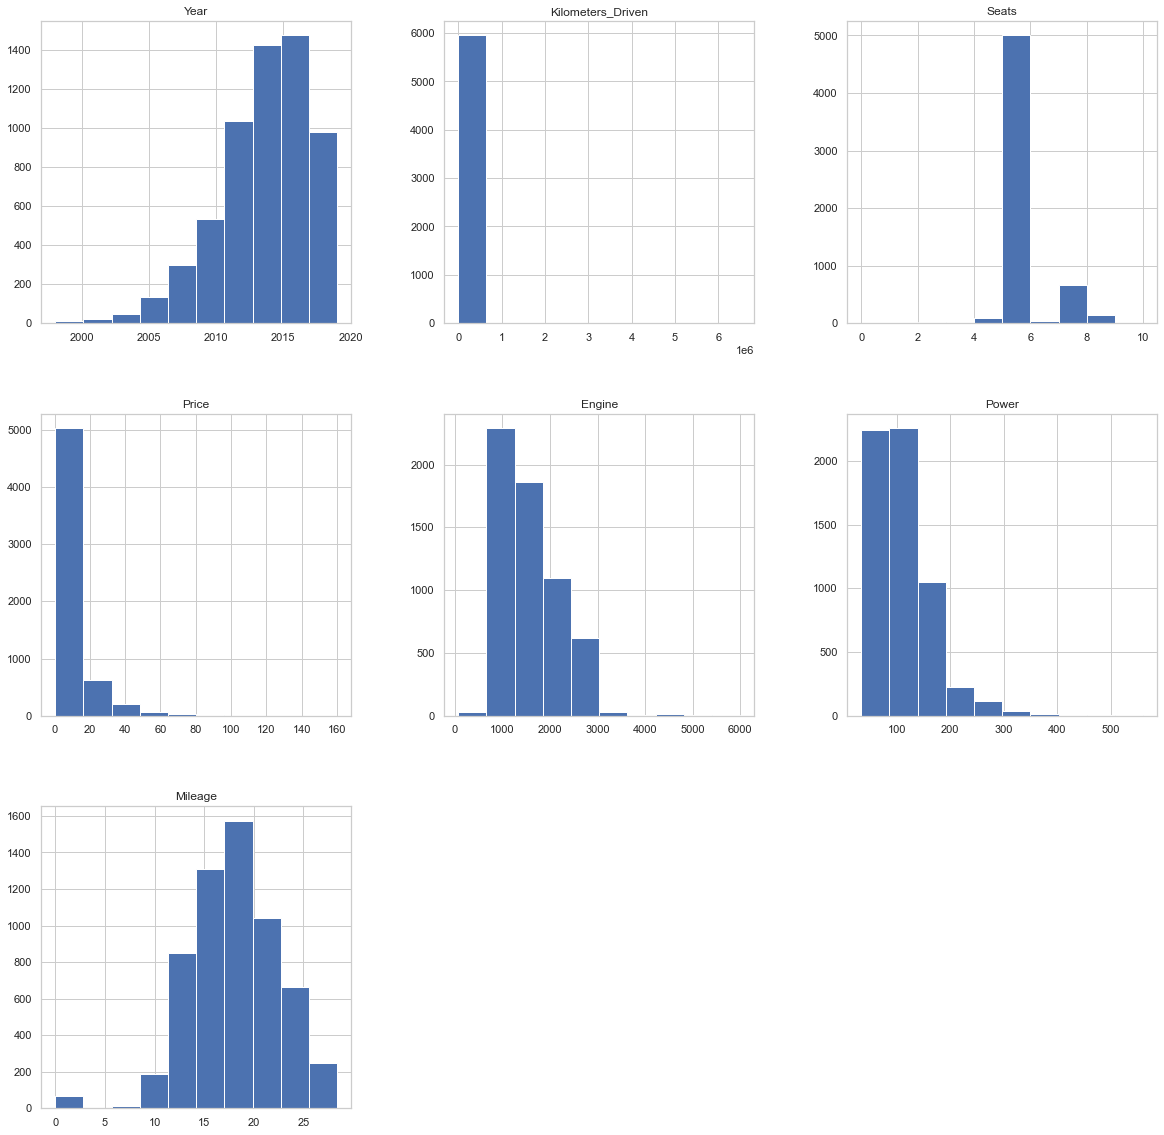

In [154]:
df.hist(figsize=(20,20))

In [155]:
x_train, x_test, y_train, y_test=train_test_split(x, y, random_state=0, test_size=0.3)

In [156]:
type(y_train.values)

numpy.ndarray

In [194]:
model=Sequential()
model.add(Dense(18, activation='sigmoid'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='relu')) #Comunmente esto al final
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [195]:
model.fit(x=x_train, y=y_train.values, validation_data=(x_test, y_test.values), batch_size=50, epochs=100, verbose=1)

Epoch 1/100
84/84 [==============================] - 1s 4ms/step - loss: 207.8828 - mse: 207.8828 - val_loss: 163.1639 - val_mse: 163.1639
Epoch 2/100
84/84 [==============================] - 0s 2ms/step - loss: 184.6151 - mse: 184.6151 - val_loss: 141.7460 - val_mse: 141.7460
Epoch 3/100
84/84 [==============================] - 0s 2ms/step - loss: 162.1181 - mse: 162.1181 - val_loss: 122.5481 - val_mse: 122.5481
Epoch 4/100
84/84 [==============================] - 0s 2ms/step - loss: 144.4862 - mse: 144.4862 - val_loss: 110.5193 - val_mse: 110.5193
Epoch 5/100
84/84 [==============================] - 0s 2ms/step - loss: 134.1897 - mse: 134.1897 - val_loss: 104.3589 - val_mse: 104.3589
Epoch 6/100
84/84 [==============================] - 0s 2ms/step - loss: 128.2069 - mse: 128.2069 - val_loss: 100.0508 - val_mse: 100.0508
Epoch 7/100
84/84 [==============================] - 0s 2ms/step - loss: 122.9856 - mse: 122.9856 - val_loss: 94.6462 - val_mse: 94.6462
Epoch 8/100
84/84 [==========

84/84 [==============================] - 0s 2ms/step - loss: 34.9337 - mse: 34.9337 - val_loss: 24.3468 - val_mse: 24.3468
Epoch 62/100
84/84 [==============================] - 0s 2ms/step - loss: 34.5437 - mse: 34.5437 - val_loss: 24.3292 - val_mse: 24.3292
Epoch 63/100
84/84 [==============================] - 0s 2ms/step - loss: 34.2845 - mse: 34.2845 - val_loss: 24.0340 - val_mse: 24.0340
Epoch 64/100
84/84 [==============================] - 0s 2ms/step - loss: 34.0283 - mse: 34.0283 - val_loss: 23.7529 - val_mse: 23.7529
Epoch 65/100
84/84 [==============================] - 0s 2ms/step - loss: 33.6335 - mse: 33.6335 - val_loss: 23.5722 - val_mse: 23.5722
Epoch 66/100
84/84 [==============================] - 0s 2ms/step - loss: 33.3352 - mse: 33.3352 - val_loss: 23.4247 - val_mse: 23.4247
Epoch 67/100
84/84 [==============================] - 0s 2ms/step - loss: 33.0220 - mse: 33.0220 - val_loss: 23.1700 - val_mse: 23.1700
Epoch 68/100
84/84 [==============================] - 0s 2ms/

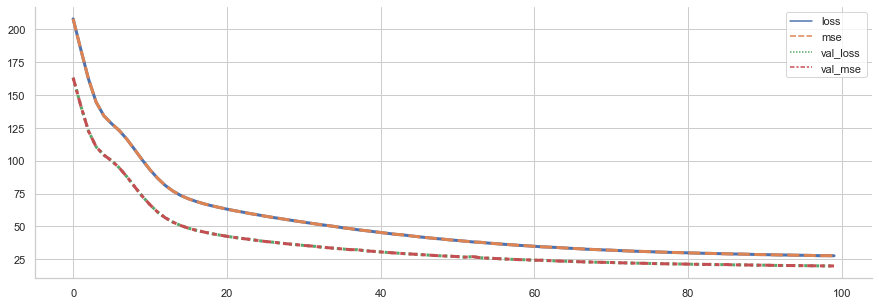

In [196]:
##Generar perdida y accuracy
loss=pd.DataFrame(model.history.history)
plt.figure(figsize=(15,5))
sns.lineplot(data=loss, lw=3)
sns.despine()

In [197]:
y_pred = model.predict(x_test)
print(mean_absolute_error(y_test,y_pred))

2.620944863499746


In [211]:
y

1       12.50
2        4.50
3        6.00
4       17.74
6        3.50
        ...  
6014     4.75
6015     4.00
6016     2.90
6017     2.65
6018     2.50
Name: Price, Length: 5953, dtype: float64

In [204]:
x[0]

array([0.80952381, 0.00628155, 0.5       , 0.25480931, 0.17497147,
       0.69260563, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ,
       0.        ])

In [225]:
y_pre = model.predict(x[0].reshape(1, -1))

KeyError: 0

In [207]:
y_pre

array([[10.576687]], dtype=float32)